# Valiate semantic similarity

This notebook tries to validate the consistency of the semantic similarity measures that have been developed.

## Common imports and initializations

In [1]:
import sys
PATHS_TO_ADD = [
    "../src"
]
for p in PATHS_TO_ADD:
    if p not in sys.path:
        sys.path.append(p)

In [18]:
from linguistic_analysis.semantics.similarity import SemGraph, get_triangulation_angle_distance

import numpy as np
import os
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm
from typing import Iterable, Tuple

## 1. Validate code

Load embedding models.

In [3]:
FULL_MODEL_PATH = "../models/french_novels/balzac/joint/accents_lemmatized/balzac_w2v_sg_w10_mincount5_ep/balzac_w2v_sg_w10_mincount5_ep.model"
PARTIAL_MODELS_DIR = "../models/french_novels/balzac/separate/with_accents_lemmatized"

full_model = KeyedVectors.load(FULL_MODEL_PATH)
model_paths = []
models = []

for root, dirs, files in os.walk(PARTIAL_MODELS_DIR):
    for f in files:
        if f.endswith(".model"):
            model_path = os.path.join(root, f)
            print("Loading {}...".format(model_path))
            model_paths.append(model_path)
            models.append(KeyedVectors.load(model_path))


Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Pierre Grassou - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Gobseck - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Contrat de mariage - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Une double famille - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Message - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/La Muse du departement - Honore de Balzac/model_w2v_s

Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Cure de village - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Le Cure de Tours - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Les deux poetes - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/La Peau de chagrin - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Les paysans - Honore de Balzac/model_w2v_sg_w10_mincount5_ep/model_w2v_sg_w10_mincount5_ep.model...
Loading ../models/french_novels/balzac/separate/with_accents_lemmatized/Une tenebreuse affaire - Honore de Balzac/mod

Initial keywords

In [4]:
base_words = [
    "argent",
    "payement", 
    "paiement",
    "banque",
    "banquier",
    "crédit",
    "créancier",
    "capital",
    "dépôt",
    "prêt",
    "remboursement",
    "créance",
    "prix",
    "dette",
    "bail",
    "revenu",
    "rente",
    "franc",
#    "louis d’or",
    "écus",
    "budget"
]

**Build the base semgraph**

- Use this semgraph to select the words to include in every other semgraph.
- This set of words will be fixed.
- All the rest of the semgraphs will contain the same words.
- All links between words will be included in the semgraph.
- Set threshold for links of the semgraph to 0.5.



In [5]:
N_TOP_SIMILAR = 10
SIMILARITY_THRESHOLD = 0.5

In [6]:
full_sem_graph = SemGraph.build_from_gensim_embedding(full_model, base_words, 
                                                      n_top_similar=N_TOP_SIMILAR,
                                                      similarity_threshold=SIMILARITY_THRESHOLD)


In [7]:
len(full_sem_graph.names)

111

### 1.1. Message passing based similarity

### 1.2. Graph triangulation based similarity

In [8]:
full_semgraph_triangulation = full_sem_graph.get_triangulation()

In [9]:
print("The triangulation has {} triangles".format(len(full_semgraph_triangulation.triangles)))
num_triangles = 100
print(f"\nThe {num_triangles} first triangles:")
for t in full_semgraph_triangulation.triangles[:num_triangles]:
    print(str(t) + "\n")

The triangulation has 67526 triangles

The 100 first triangles:
Triangle[name: acquisition_adjudication_appointement, acquisition-adjudication: 1.0, adjudication-appointement: 1.0 ,acquisition-appointement: 0.4143933653831482; cos_acquisition: 0.2071966826915741, cos_adjudication: 0.9141390693632143, cos_appointement:0.2071966826915741]

Triangle[name: acquisition_adjudication_argent, acquisition-adjudication: 1.0, adjudication-argent: 1.0 ,acquisition-argent: 0.4334295392036438; cos_acquisition: 0.2167147696018219, cos_adjudication: 0.9060694172728585, cos_argent:0.2167147696018219]

Triangle[name: acquisition_adjudication_bail, acquisition-adjudication: 1.0, adjudication-bail: 1.0 ,acquisition-bail: 0.349043071269989; cos_acquisition: 0.1745215356349945, cos_adjudication: 0.9390844671992067, cos_bail:0.1745215356349945]

Triangle[name: acquisition_adjudication_bénéfice, acquisition-adjudication: 1.0, adjudication-bénéfice: 1.0 ,acquisition-bénéfice: 0.47105950117111206; cos_acquisiti

## 2. Intra embedding consistency

## 3. Validation of the semantic similarity between different models

In [10]:
#print(f"{models[0]}: {model_paths[0]}")
#print(f"{models[1]}: {model_paths[1]}")

In [11]:
# Generate semgraphs for all the models
semgraphs = []
for m in tqdm(models):
    semgraphs.append(SemGraph.build_from_gensim_embedding(m, base_words, 
                                                      n_top_similar=N_TOP_SIMILAR,
                                                      similarity_threshold=SIMILARITY_THRESHOLD))

100%|██████████| 94/94 [00:11<00:00,  8.08it/s]


In [16]:
# Calculate the angle distance between the triangulations of two SemGraphs.
get_triangulation_angle_distance(g_0, g_1)

(33916.002917328915, 0.9253772862221744)

In [26]:
# Calculate the matrix of angle distances between the triangulations of the SemGraphs of the books.
angle_distance_matrix = np.zeros((len(semgraphs), len(semgraphs)))
for i in tqdm(range(len(semgraphs))):
    for j in tqdm(range(len(semgraphs))):
        if (i<j):
            angle_distance_matrix[i][j] = get_triangulation_angle_distance(semgraphs[i], semgraphs[j])[1]
        else:
            angle_distance_matrix[i][j] = angle_distance_matrix[j][i]

 70%|███████   | 66/94 [15:57<08:11, 17.54s/it]


  2%|▏         | 2/94 [1:28:01<67:28:52, 2640.58s/it]


KeyboardInterrupt: 

In [28]:
angle_distance_matrix[0]

array([0.        , 0.92537729, 0.87190753, 0.97090585, 0.9076925 ,
       0.93092679, 0.86971627, 0.81244813, 0.82305435, 0.9076925 ,
       0.87622405, 0.84430369, 0.86377589, 0.91616258, 0.75797168,
       0.88897292, 0.9076925 , 0.83218268, 0.79479353, 0.75327399,
       0.9076925 , 0.84784885, 0.90042037, 0.87073725, 0.80009548,
       0.83995139, 0.85111241, 0.81921903, 0.87017522, 0.92418525,
       0.98053061, 0.88970452, 0.86348879, 0.9076925 , 0.81347933,
       0.78895549, 0.83853428, 1.01939227, 0.84534018, 0.87127857,
       0.85972463, 0.9076925 , 0.87406807, 0.95456458, 0.85195058,
       1.02095404, 0.9076925 , 0.87467432, 0.8778333 , 0.8984653 ,
       0.9076925 , 0.9076925 , 0.9253814 , 0.84605843, 0.86262223,
       0.80682888, 0.88669897, 0.86730877, 0.83736519, 0.86287938,
       0.85247992, 0.82899556, 0.8035002 , 0.9076925 , 0.91011553,
       0.77330393, 0.87764726, 0.81277854, 0.97170394, 0.9076925 ,
       0.88262325, 0.86603207, 0.77953313, 0.90097078, 0.83209

In [34]:
import plotly_express as px

?px.histogram

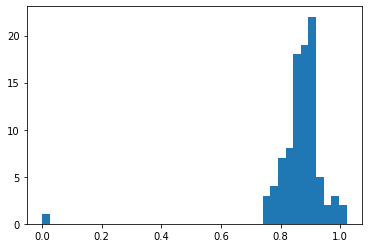

In [39]:
import matplotlib.pyplot as plt

plt.hist(angle_distance_matrix[0], bins=40);

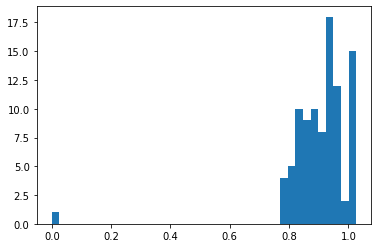

In [40]:
plt.hist(angle_distance_matrix[1], bins=40);